# ***Tarea 1. Effective Spread***

### Luis Eduardo Jiménez del Muro - 28/08/2025

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.6f' % x)

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['grid.alpha'] = 0.3

# **Block method**

In [2]:
data = pd.read_csv('data/aapl_5m_train.csv')
data.drop(columns=['Unnamed: 0', 'Gmtoffset', 'Datetime', 'Volume'], inplace=True)
data['Diff'] = data['Close'].diff()
data = data.dropna().reset_index(drop=True)

windows = [5, 10, 20, 50, 100]


for window in windows:
    covs = [None] * len(data)

    for i in range(len(data) - 2*window + 1):
        up_block = data['Diff'][i:i+window]
        down_block = data['Diff'][i+window:i+2*window]

        cov = np.cov(up_block, down_block)[0][1]
        covs[i + 2*window - 1] = cov
        

    data[f'Cov_{window}'] = covs
    data[f'Spread_{window}'] = 2 * np.sqrt(np.abs(data[f'Cov_{window}']))


bid_ask = pd.DataFrame()
for i in range(len(windows)):
    bid_ask[f'Bid_{windows[i]}'] = np.where(data['Diff'] > 0, #Si subió entonces es un ask
                                            data['Close'] - data[f'Spread_{windows[i]}'], #Restar spread convierte a bid
                                            data['Close']) #Ask
    bid_ask[f'Ask_{windows[i]}'] = np.where(data['Diff'] > 0,
                                            data['Close'], #Bid
                                            data['Close'] + data[f'Spread_{windows[i]}']) #Sumar spread convierte a ask

mean_spreads_block = [data[f'Spread_{window}'].mean() for window in windows]

bid_ask.head(30)

,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN
1,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
2,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
3,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
4,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
5,131.119995,NaN,131.119995,NaN,131.119995,NaN,131.119995,NaN,131.119995,NaN
6,130.875000,NaN,130.875000,NaN,130.875000,NaN,130.875000,NaN,130.875000,NaN
7,130.509902,NaN,130.509902,NaN,130.509902,NaN,130.509902,NaN,130.509902,NaN
8,NaN,130.889999,NaN,130.889999,NaN,130.889999,NaN,130.889999,NaN,130.889999
9,130.482561,130.935806,NaN,130.935806,NaN,130.935806,NaN,130.935806,NaN,130.935806


## *Series de tiempo*

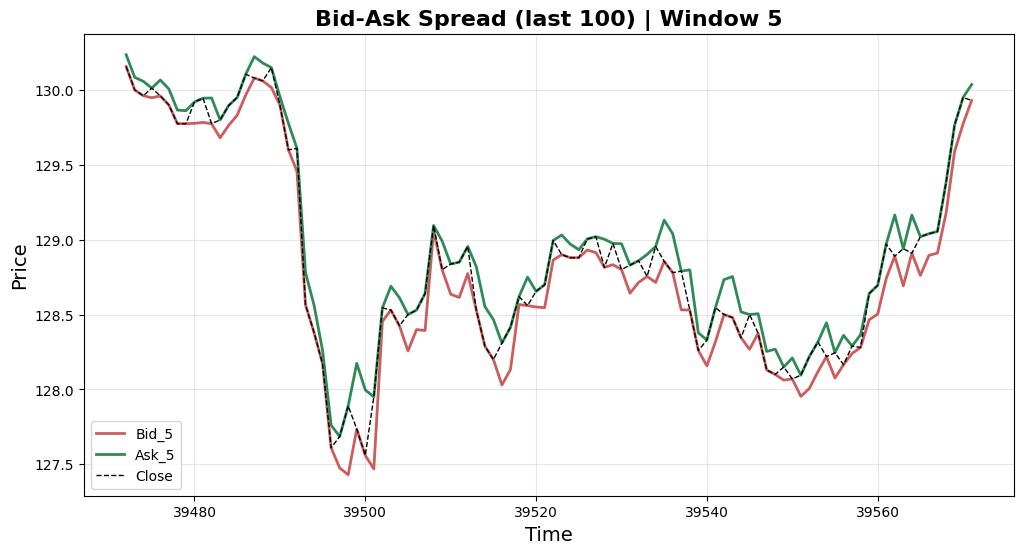

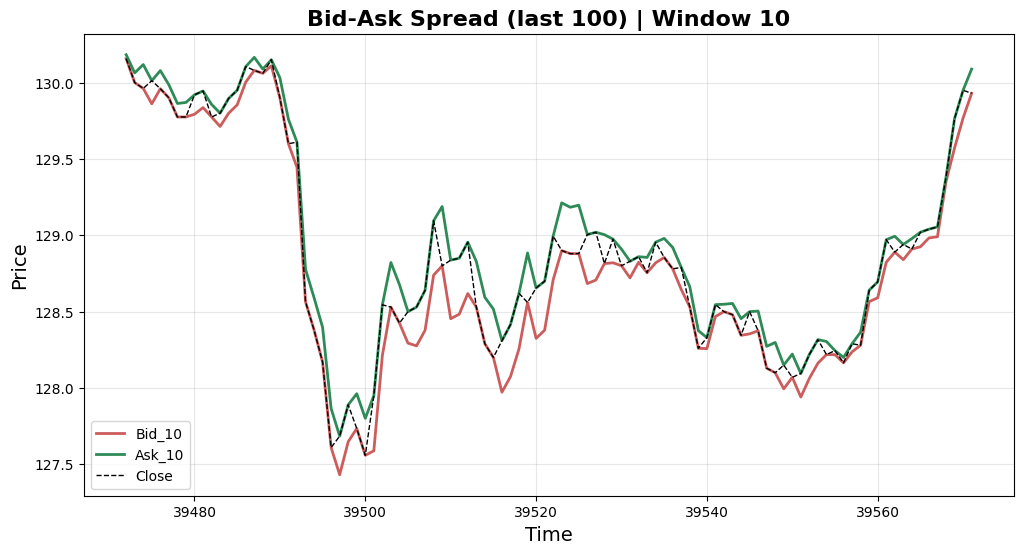

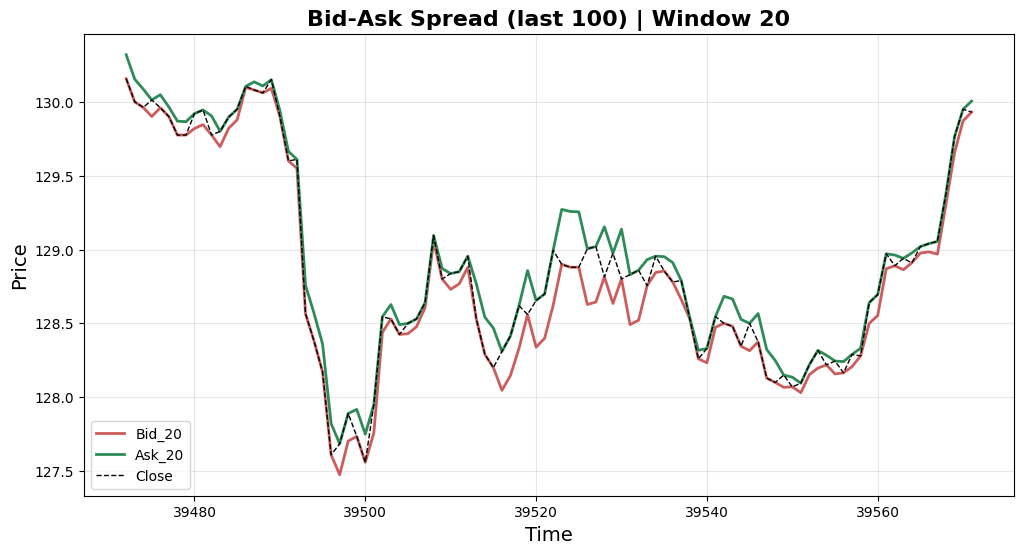

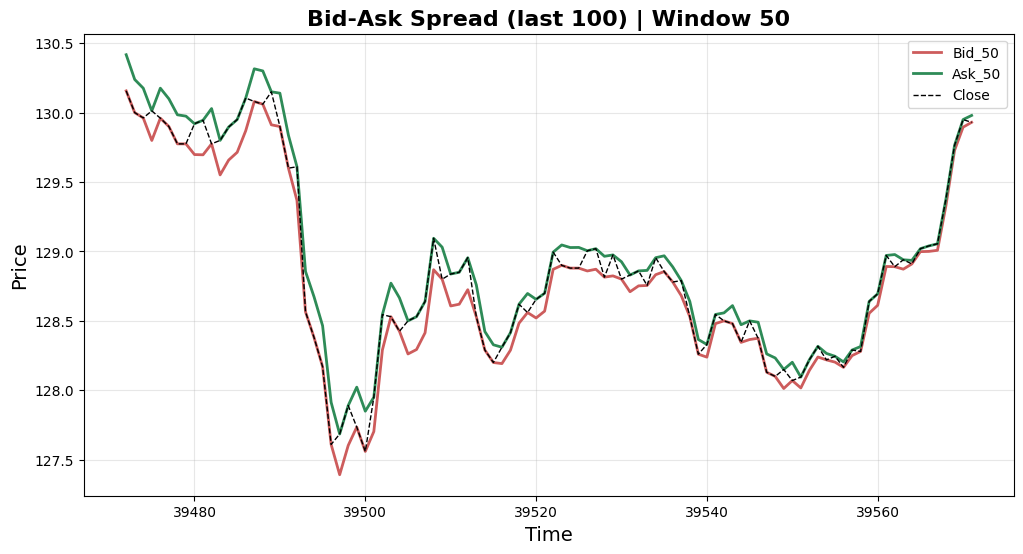

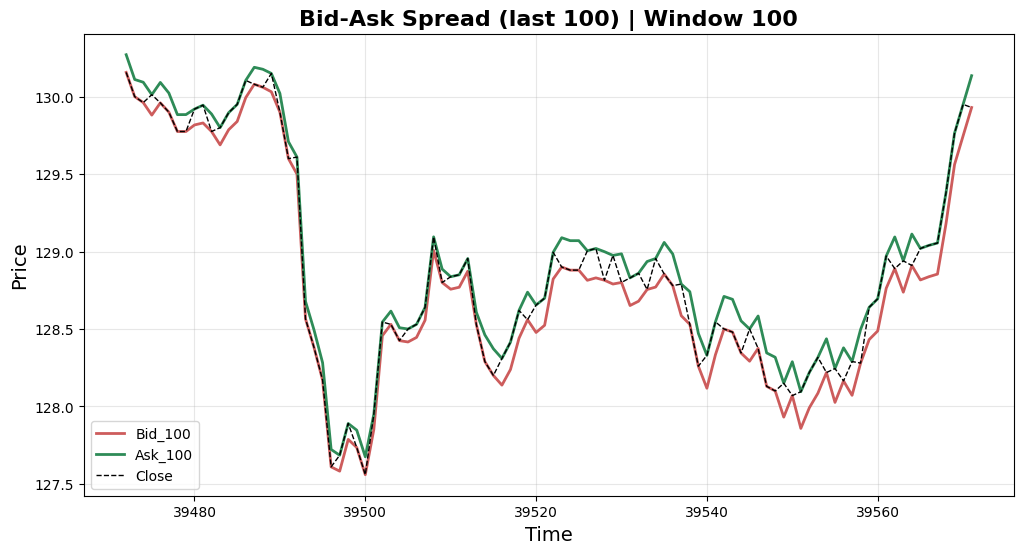

In [3]:
for bid in bid_ask.filter(like='Bid').columns:
    plt.figure()
    plt.plot(bid_ask[bid].tail(100), label=bid, color='indianred', lw=2)
    plt.plot(bid_ask[bid.replace('Bid', 'Ask')].tail(100), label=bid.replace('Bid', 'Ask'), color='seagreen', lw=2)
    plt.plot(data['Close'].tail(100), label='Close', color='k', lw=1, alpha=1, ls='--')
    plt.title(f'Bid-Ask Spread (last 100) | Window {bid.split("_")[-1]}')
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# **Serial covariance method**

In [4]:
data = pd.read_csv('data/aapl_5m_train.csv')
data.drop(columns=['Unnamed: 0', 'Gmtoffset', 'Datetime', 'Volume'], inplace=True)
data['Diff'] = data['Close'].diff()
data['Diff_Shift'] = data['Diff'].shift()
data = data.dropna().reset_index(drop=True)

windows = [5, 10, 20, 50, 100]


for window in windows:
    data[f'W_{window}'] = data['Diff'].rolling(window=window).cov(data['Diff_Shift'])

for i in range(len(windows)):
    data[f'Spread_{windows[i]}'] = 2 * np.sqrt(np.abs(data[f'W_{windows[i]}']))


bid_ask = pd.DataFrame()
for i in range(len(windows)):
    bid_ask[f'Bid_{windows[i]}'] = np.where(data['Diff'] > 0, #Si subió entonces es un ask
                                            data['Close'] - data[f'Spread_{windows[i]}'], #Restar spread convierte a bid
                                            data['Close']) #Ask
    bid_ask[f'Ask_{windows[i]}'] = np.where(data['Diff'] > 0,
                                            data['Close'], #Bid
                                            data['Close'] + data[f'Spread_{windows[i]}']) #Sumar spread convierte a ask
    
mean_spreads_serial_covariance = [data[f'Spread_{window}'].mean() for window in windows]

bid_ask.head(30)

,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
1,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
2,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
3,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
4,131.119995,131.685307,131.119995,NaN,131.119995,NaN,131.119995,NaN,131.119995,NaN
5,130.875000,131.110543,130.875000,NaN,130.875000,NaN,130.875000,NaN,130.875000,NaN
6,130.509902,130.987652,130.509902,NaN,130.509902,NaN,130.509902,NaN,130.509902,NaN
7,130.620137,130.889999,NaN,130.889999,NaN,130.889999,NaN,130.889999,NaN,130.889999
8,130.783359,130.935806,NaN,130.935806,NaN,130.935806,NaN,130.935806,NaN,130.935806
9,130.836237,131.053604,130.746168,131.053604,NaN,131.053604,NaN,131.053604,NaN,131.053604


## *Series de tiempo*

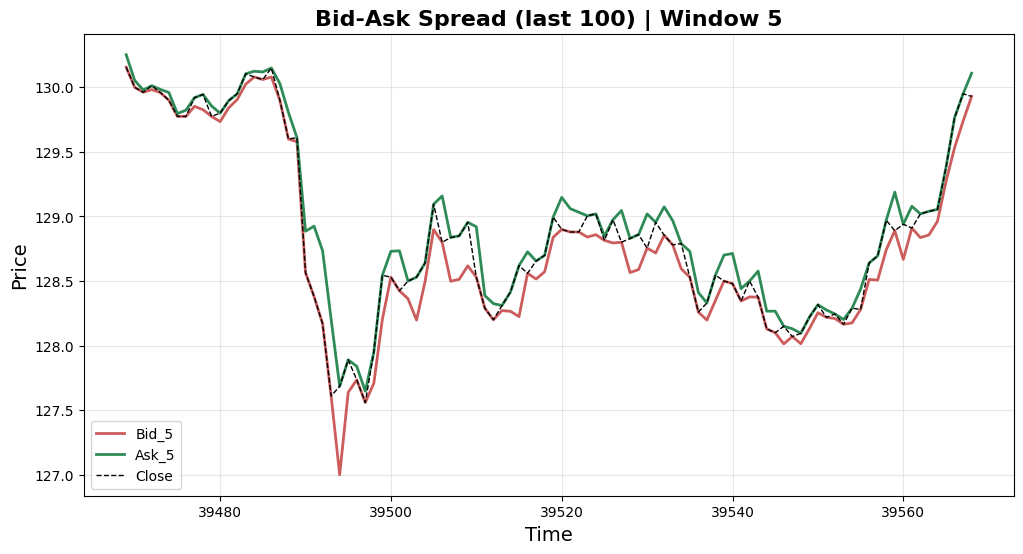

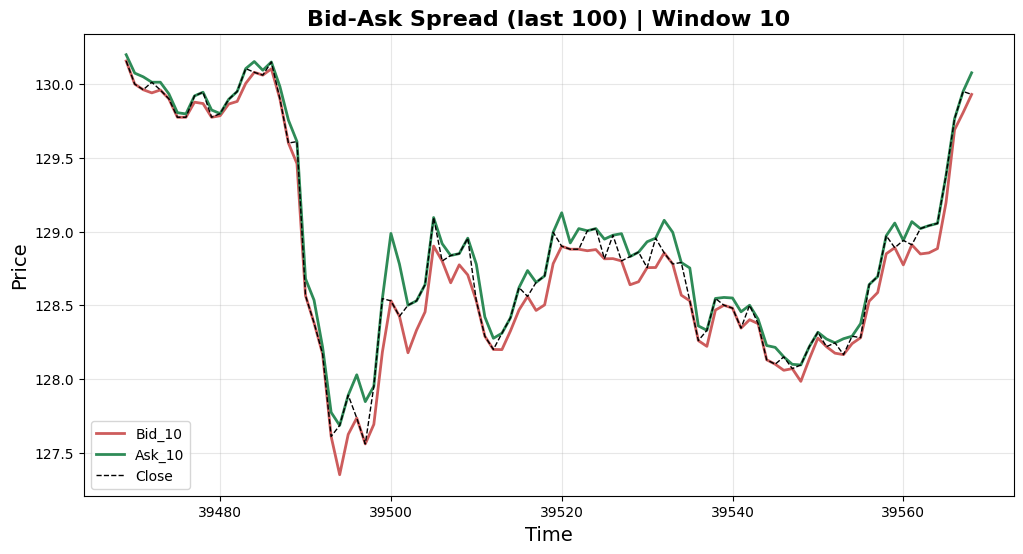

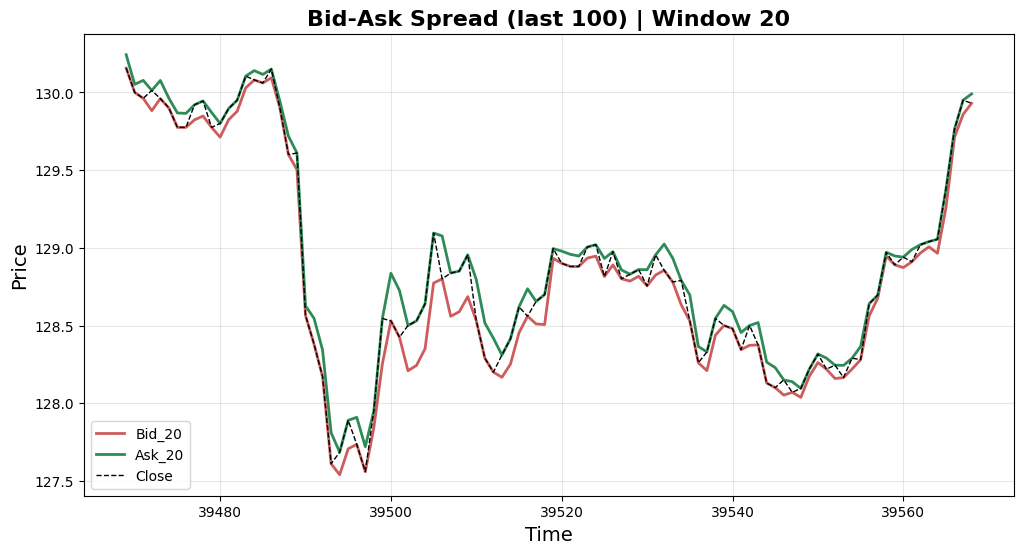

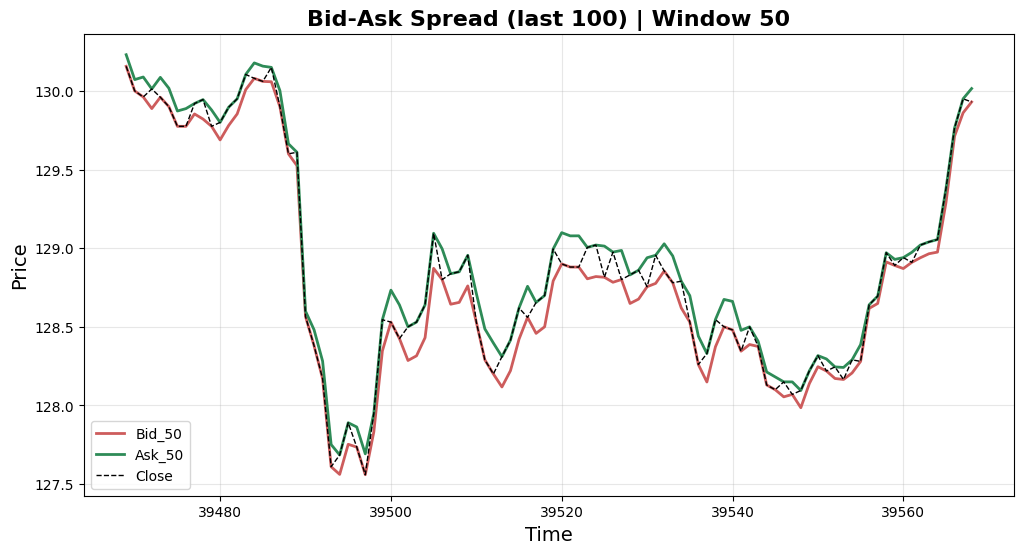

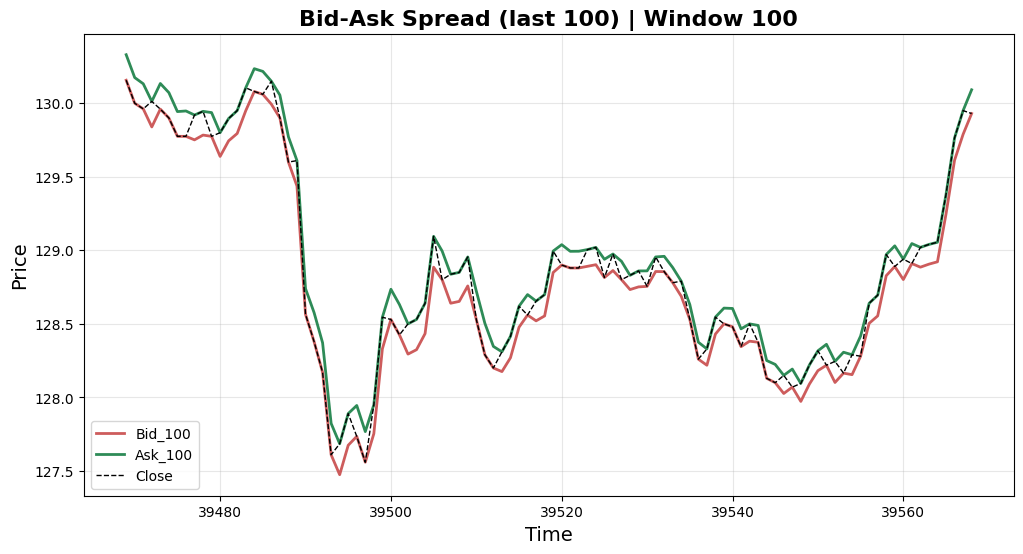

In [5]:
for bid in bid_ask.filter(like='Bid').columns:
    plt.figure()
    plt.plot(bid_ask[bid].tail(100), label=bid, color='indianred', lw=2)
    plt.plot(bid_ask[bid.replace('Bid', 'Ask')].tail(100), label=bid.replace('Bid', 'Ask'), color='seagreen', lw=2)
    plt.plot(data['Close'].tail(100), label='Close', color='k', lw=1, alpha=1, ls='--')
    plt.title(f'Bid-Ask Spread (last 100) | Window {bid.split("_")[-1]}')
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# **Comparación de los spread promedios**

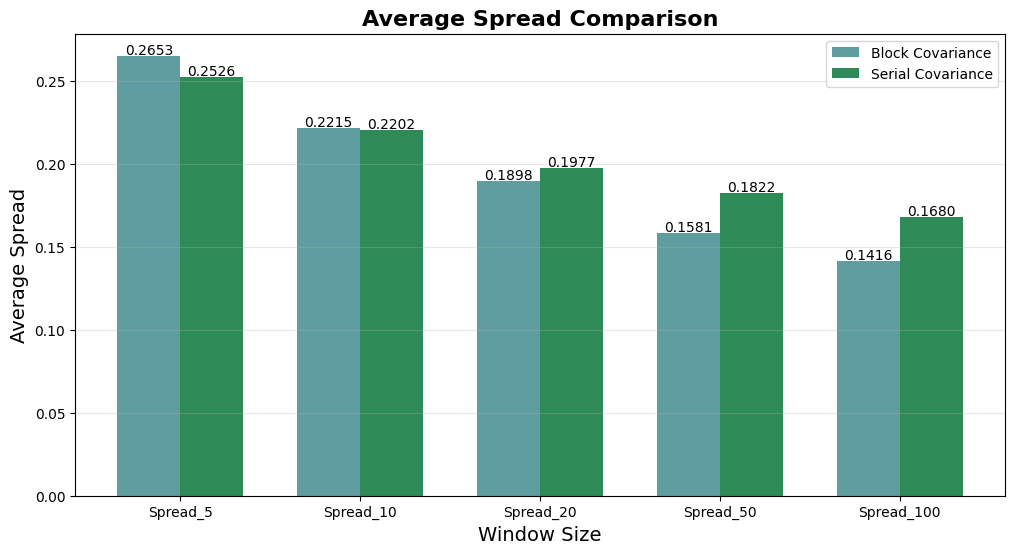

In [19]:
x = np.arange(len(windows))
width = 0.35

plt.figure()

plt.bar(x - width/2, mean_spreads_block, width, label='Block Covariance', color='cadetblue')
plt.bar(x + width/2, mean_spreads_serial_covariance, width, label='Serial Covariance', color='seagreen')

for i in range(len(windows)):
    plt.text(x[i] - width/2, mean_spreads_block[i] + 0.001, f'{mean_spreads_block[i]:.4f}', ha='center')
    plt.text(x[i] + width/2, mean_spreads_serial_covariance[i] + 0.001, f'{mean_spreads_serial_covariance[i]:.4f}', ha='center')

plt.xticks(x, [data[f'Spread_{window}'].name for window in windows])
plt.xlabel('Window Size')
plt.ylabel('Average Spread')
plt.title('Average Spread Comparison')
plt.grid(axis='y')
plt.legend()        
plt.show()

# **Conclusión**

Luego de comparar los spreads promedio obtenidos con ambos métodos, creo que el método que mejor se ajustaría a esta serie de tiempo sería el de **serial covariance**. La razón es por consistecia, pues el rango entre el mayor y menor spread obtenidos con este método es menor al rango que existe en el método de block covariance. Esto me hace pensar que tuvo menos errores logrando resultados más precisos.

Otro punto a mencionar sería que a medida que la ventana aumenta el spread decrece. Con esto, sería pertinente que dependiendo de la liquidez y volatilidad de un activo se seleccione una ventana adecuada. Puesto que en este momento se trata de un activo volatil pienso que lo mejor sería utilizar un spread con ventana de entre 10 y 30 con el método de serial covariance.